<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-modelling-and-simulation-college-task/blob/main/final_test/kode_simulasi_bendungan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SISTEM KONTROL PINTU AIR BENDUNGAN DENGAN LOGIKA FUZZY SUGENO**

Studi Kasus: Proyek SAKTI (Sistem Antisipasi Ketinggian Air Terpadu)

Oleh: Lathif Ramadhan (5231811022)

UAS Pemodelan dan Simulasi

## **1. Import Library**

In [4]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## **2. Fuzzifikasi: Definisi Variabel Input dan Output**


Catatan: Dalam scikit-fuzzy, tidak ada tipe "sugeno" murni.
Kita mensimulasikan model Sugeno Orde-Nol dengan mendefinisikan konsekuen (output) sebagai himpunan fuzzy singleton (segitiga sangat sempit) atau menggunakan pendekatan Mamdani yang hasil defuzzifikasinya setara dengan rata-rata tertimbang dari centroid singleton tersebut.

### **2.1. Variabel Input (Antecedents)**


In [15]:
# Semesta pembicaraan dibuat sedikit lebih lebar untuk visualisasi yang baik
TMA = ctrl.Antecedent(np.arange(80, 111, 1), 'Tinggi Muka Air (TMA)')
inflow = ctrl.Antecedent(np.arange(50, 251, 1), 'Debit Air Masuk (Inflow)')
hujan = ctrl.Antecedent(np.arange(0, 101, 1), 'Intensitas Curah Hujan')

### **2.2. Variabel Output (Consequent)**

In [16]:
bukaan_pintu = ctrl.Consequent(np.arange(0, 101, 1), 'Derajat Pembukaan Pintu Air')

### **2.3. Definisi Fungsi Keanggotaan Variabel Input**

In [18]:
# Definisi Fungsi Keanggotaan untuk TMA
TMA['Aman']   = fuzz.trapmf(TMA.universe, [80, 80, 90, 95])
TMA['Siaga']  = fuzz.trimf(TMA.universe, [90, 97.5, 105])
TMA['Bahaya'] = fuzz.trapmf(TMA.universe, [100, 105, 110, 110])

# Definisi Fungsi Keanggotaan untuk Inflow
inflow['Rendah'] = fuzz.trapmf(inflow.universe, [50, 50, 100, 125])
inflow['Normal'] = fuzz.trimf(inflow.universe, [100, 150, 200])
inflow['Tinggi'] = fuzz.trapmf(inflow.universe, [175, 200, 250, 250])

# Definisi Fungsi Keanggotaan untuk Hujan
hujan['Ringan'] = fuzz.trapmf(hujan.universe, [0, 0, 20, 40])
hujan['Sedang'] = fuzz.trimf(hujan.universe, [30, 50, 70])
hujan['Lebat']  = fuzz.trapmf(hujan.universe, [60, 80, 100, 100])

# Definisi konstanta output (disimulasikan sebagai singleton/segitiga sempit)
bukaan_pintu['Tutup'] = fuzz.trimf(bukaan_pintu.universe, [0, 0, 1])
bukaan_pintu['BukaKecil'] = fuzz.trimf(bukaan_pintu.universe, [29, 30, 31])
bukaan_pintu['BukaSedang'] = fuzz.trimf(bukaan_pintu.universe, [64, 65, 66])
bukaan_pintu['BukaPenuh'] = fuzz.trimf(bukaan_pintu.universe, [99, 100, 100])

## **3. Visualisasi Fungsi Keanggotaan**

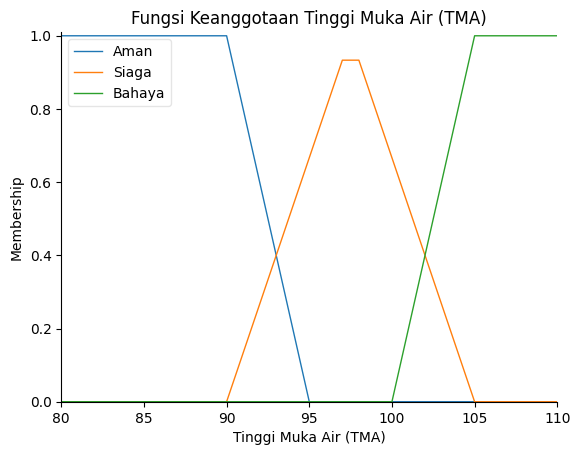

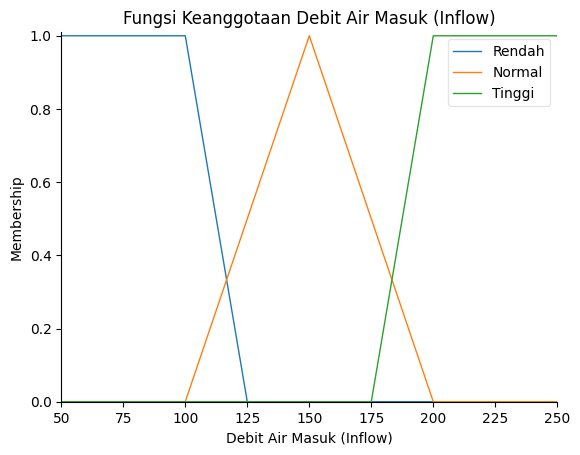

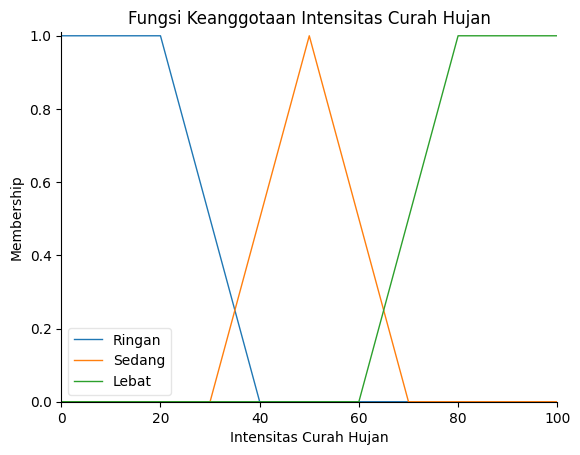

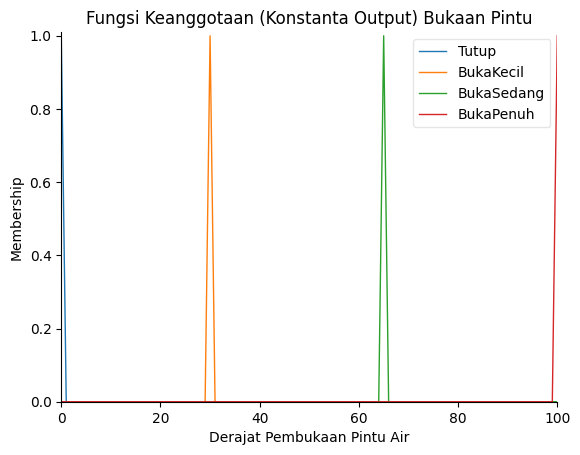

In [19]:
TMA.view()
plt.title('Fungsi Keanggotaan Tinggi Muka Air (TMA)')
plt.savefig('grafik_tma.png')

inflow.view()
plt.title('Fungsi Keanggotaan Debit Air Masuk (Inflow)')
plt.savefig('grafik_inflow.png')

hujan.view()
plt.title('Fungsi Keanggotaan Intensitas Curah Hujan')
plt.savefig('grafik_hujan.png')

bukaan_pintu.view()
plt.title('Fungsi Keanggotaan (Konstanta Output) Bukaan Pintu')
plt.savefig('grafik_output.png')

## **4. Basis Aturan (Rule Base)**


Terdapat total 27 aturan. Didefinisikan secara eksplisit.
Keterangan: | = OR , & = AND

In [20]:
# Kondisi TMA = AMAN
rule1  = ctrl.Rule(TMA['Aman'] & inflow['Rendah'] & hujan['Ringan'], bukaan_pintu['Tutup'])
rule2  = ctrl.Rule(TMA['Aman'] & inflow['Rendah'] & hujan['Sedang'], bukaan_pintu['Tutup'])
rule3  = ctrl.Rule(TMA['Aman'] & inflow['Rendah'] & hujan['Lebat'],  bukaan_pintu['BukaKecil'])
rule4  = ctrl.Rule(TMA['Aman'] & inflow['Normal'] & hujan['Ringan'], bukaan_pintu['Tutup'])
rule5  = ctrl.Rule(TMA['Aman'] & inflow['Normal'] & hujan['Sedang'], bukaan_pintu['BukaKecil'])
rule6  = ctrl.Rule(TMA['Aman'] & inflow['Normal'] & hujan['Lebat'],  bukaan_pintu['BukaKecil'])
rule7  = ctrl.Rule(TMA['Aman'] & inflow['Tinggi'] & hujan['Ringan'], bukaan_pintu['BukaKecil'])
rule8  = ctrl.Rule(TMA['Aman'] & inflow['Tinggi'] & hujan['Sedang'], bukaan_pintu['BukaSedang'])
rule9  = ctrl.Rule(TMA['Aman'] & inflow['Tinggi'] & hujan['Lebat'],  bukaan_pintu['BukaSedang'])

# Kondisi TMA = SIAGA
rule10 = ctrl.Rule(TMA['Siaga'] & inflow['Rendah'] & hujan['Ringan'], bukaan_pintu['BukaKecil'])
rule11 = ctrl.Rule(TMA['Siaga'] & inflow['Rendah'] & hujan['Sedang'], bukaan_pintu['BukaKecil'])
rule12 = ctrl.Rule(TMA['Siaga'] & inflow['Rendah'] & hujan['Lebat'],  bukaan_pintu['BukaSedang'])
rule13 = ctrl.Rule(TMA['Siaga'] & inflow['Normal'] & hujan['Ringan'], bukaan_pintu['BukaKecil'])
rule14 = ctrl.Rule(TMA['Siaga'] & inflow['Normal'] & hujan['Sedang'], bukaan_pintu['BukaSedang'])
rule15 = ctrl.Rule(TMA['Siaga'] & inflow['Normal'] & hujan['Lebat'],  bukaan_pintu['BukaSedang'])
rule16 = ctrl.Rule(TMA['Siaga'] & inflow['Tinggi'] & hujan['Ringan'], bukaan_pintu['BukaSedang'])
rule17 = ctrl.Rule(TMA['Siaga'] & inflow['Tinggi'] & hujan['Sedang'], bukaan_pintu['BukaPenuh'])
rule18 = ctrl.Rule(TMA['Siaga'] & inflow['Tinggi'] & hujan['Lebat'],  bukaan_pintu['BukaPenuh'])

# Kondisi TMA = BAHAYA
rule19 = ctrl.Rule(TMA['Bahaya'] & inflow['Rendah'] & hujan['Ringan'], bukaan_pintu['BukaSedang'])
rule20 = ctrl.Rule(TMA['Bahaya'] & inflow['Rendah'] & hujan['Sedang'], bukaan_pintu['BukaSedang'])
rule21 = ctrl.Rule(TMA['Bahaya'] & inflow['Rendah'] & hujan['Lebat'],  bukaan_pintu['BukaPenuh'])
rule22 = ctrl.Rule(TMA['Bahaya'] & inflow['Normal'] & hujan['Ringan'], bukaan_pintu['BukaSedang'])
rule23 = ctrl.Rule(TMA['Bahaya'] & inflow['Normal'] & hujan['Sedang'], bukaan_pintu['BukaPenuh'])
rule24 = ctrl.Rule(TMA['Bahaya'] & inflow['Normal'] & hujan['Lebat'],  bukaan_pintu['BukaPenuh'])
rule25 = ctrl.Rule(TMA['Bahaya'] & inflow['Tinggi'] & hujan['Ringan'], bukaan_pintu['BukaPenuh'])
rule26 = ctrl.Rule(TMA['Bahaya'] & inflow['Tinggi'] & hujan['Sedang'], bukaan_pintu['BukaPenuh'])
rule27 = ctrl.Rule(TMA['Bahaya'] & inflow['Tinggi'] & hujan['Lebat'],  bukaan_pintu['BukaPenuh'])

## **5. Pembuatan Sistem Kontrol dan Simulasi**

### **5.1. Menggabungkan semua aturan ke dalam satu sistem kontrol**

In [22]:
sistem_kontrol_sakti = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
    rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
    rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27
])

### **5.2. Membuat simulasi dari sistem kontrol yang telah dibuat**


In [23]:
simulasi_sakti = ctrl.ControlSystemSimulation(sistem_kontrol_sakti)

## **6. Menjalankan Simulasi dengan Input Studi Kasus**

### **6.1. Memberikan nilai input sesuai studi kasus di perhitungan manual**

In [24]:
input_tma = 102
input_inflow = 180
input_hujan = 75

simulasi_sakti.input['Tinggi Muka Air (TMA)'] = input_tma
simulasi_sakti.input['Debit Air Masuk (Inflow)'] = input_inflow
simulasi_sakti.input['Intensitas Curah Hujan'] = input_hujan

### **6.2. Melakukan perhitungan**

In [25]:
simulasi_sakti.compute()